In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix

from src.utils import import_datasets, limpar_textos, plotar_matriz_confusao, plot_roc, plot_precision_recall

In [2]:
# carregando os datasets
df_train, df_test = import_datasets()

# tratando os dados da coluna de textos
df_train["text_clean"] = df_train["text"].apply(limpar_textos)
df_test["text_clean"] = df_test["text"].apply(limpar_textos)

df_train[linhas, colunas] = (7613, 5)
Tammanho df_train = 0.29 MB
df_test[linhas, colunas] = (3263, 4)
Tamanho df_test = 0.10 MB


In [3]:
df_train.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive #wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [4]:
df_test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about #earthquake is different cities s...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting #spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


In [5]:
# vetorização TF_IDF
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1, 2), min_df=3)

X_train = tfidf.fit_transform(df_train["text_clean"])
X_test = tfidf.transform(df_test["text_clean"])
y = df_train["target"]

In [6]:
# Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = cross_val_predict(
    LogisticRegression(max_iter=1000, C=1.0, class_weight="balanced"),
    X_train, y, cv=skf
)

In [7]:
# métricas com a Logistic Regression
print("F1 (macro):", f1_score(y, oof_preds, average="macro"))
print("Accuracy:", accuracy_score(y, oof_preds))
print("Recall:", recall_score(y, oof_preds, average="macro"))

F1 (macro): 0.7904493348449202
Accuracy: 0.7964008932089847
Recall: 0.7882934716133192


In [8]:
X_test.shape

(3263, 10003)

In [9]:
X_train.shape

(7613, 10003)

In [10]:
# preparando os dados para submissão no Kaggle
clf = LogisticRegression(max_iter=1000, C=1.0, class_weight="balanced")
clf.fit(X_train, y)
test_preds = clf.predict(X_test)

In [11]:
submission_lr = pd.DataFrame({"id": df_test["id"], "target": test_preds})
submission_lr.to_csv("resultados/submission_logreg.csv", index=False)

# Gerando gráficos

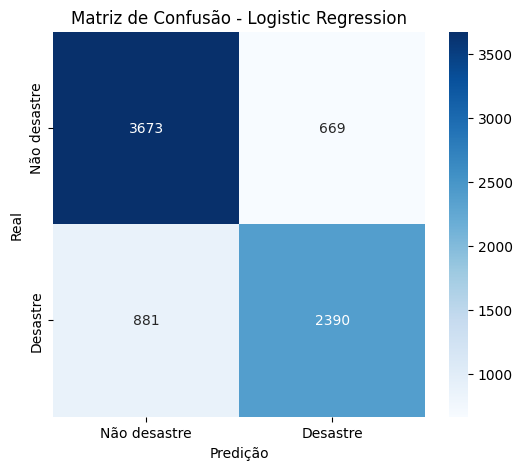

In [12]:
cm = confusion_matrix(y, oof_preds)

plotar_matriz_confusao(cm, "Logistic Regression")

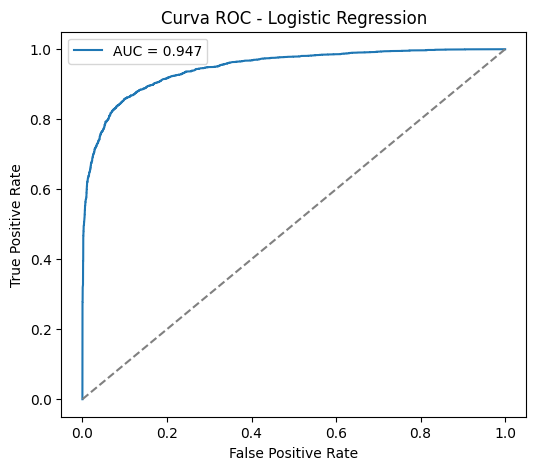

In [13]:
plot_roc(clf, X_train, y, model_name="Logistic Regression")

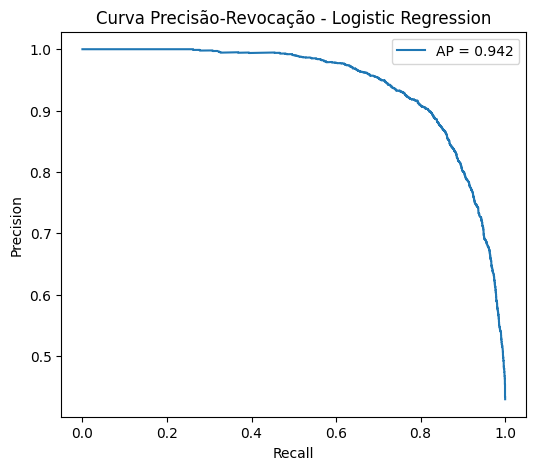

In [14]:
plot_precision_recall(clf, X_train, y, model_name="Logistic Regression")